In [2]:
import pandas as pd
import numpy as np
import re
import openpyxl
import datetime as dt
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt 

import decimal
import os
import sys

# SRC_DIR = r'/home/pp/program/jupyter/'
sys.path.append(os.path.dirname(r'/home/pp/program/jupyter/'))
from config import *

# Replace 'your_file.parquet' with the path to your Parquet file
df = pd.read_parquet(HLADINY_SK_DIR + 'hladiny_sk.parquet'   )

# print(df.info())

dectype = pa.decimal128(5, 2)
# df = df.rename(columns={'Zrážky 24h': 'Zr24h', 'Zrážky 12h': 'Zr12h', 'Zrážky 1h': 'Zr1h',  'Zrážky 6h': 'Zr6h', 'Zrážky 3h': 'Zr3h'})
print(df.memory_usage(deep=True, index=True).sum())
df["Vodný stav"] = df["Vodný stav"].astype(pd.ArrowDtype (pa.int16()))
print(df.memory_usage(deep=True, index=True).sum())
    
print(df.dtypes)

22668774
17869242
Stanica                     category
Tok                         category
Cas_CET       timestamp[ns][pyarrow]
Vodný stav            int16[pyarrow]
dtype: object


                             Cas_CET  Vodný stav
count                           2000      2000.0
mean   2025-09-20 21:15:45.900000512     13.0185
min              2025-08-09 23:45:00         1.0
25%              2025-08-30 22:30:00         6.0
50%              2025-09-20 19:15:00        10.0
75%              2025-10-11 22:00:00        16.0
max              2025-11-01 20:45:00        79.0
std                              NaN   10.979364


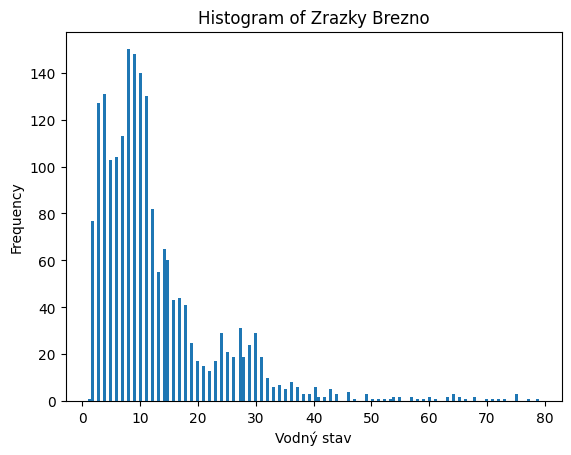

In [3]:
#BREZNO
dfbr = df[df.Stanica == 'Brezno']
print(dfbr.describe())
import matplotlib.pyplot as plt
# plt.hist(dfbr['Zrážky 12h'].__pow__(.1), bins=150)
plt.hist(dfbr.loc[dfbr['Vodný stav']>0,['Vodný stav']], bins=150)
plt.xlabel('Vodný stav')
plt.ylabel('Frequency')
plt.title('Histogram of Zrazky Brezno')
plt.show()


In [ ]:
df = pd.read_parquet(HLADINY_SK_DIR + 'hladiny_sk.parquet'   )
# make daily averages
# whole dataframe SK - not grouped by station
df_agg = df.copy()
# df_agg = df_agg.set_index('Cas_CET').resample('D')['Vodný stav'].agg(['sum', 'mean', 'max'])
# df_agg = df_agg.reset_index()

df_agg = df_agg.groupby(['Stanica', 'Tok', pd.Grouper(key='Cas_CET', freq='ME')],observed=True, )['Vodný stav'].agg(['min', 'mean', 'max']).reset_index()
# df_agg = df_agg.groupby(['Stanica', 'Tok'])['Vodný stav'].agg(['min', 'mean', 'max']).reset_index()
print(df_agg.head(30))

                  Stanica              Tok    level_2  min        mean  max
0         Banská Bystrica         Bystrica 2025-08-31   47   49.639469  102
1         Banská Bystrica         Bystrica 2025-09-30   49   56.845619   85
2         Banská Bystrica         Bystrica 2025-10-31   47   56.256131   94
3         Banská Bystrica         Bystrica 2025-11-30   64    64.47619   65
4         Banská Bystrica             Hron 2025-08-31   75   83.280835  129
5         Banská Bystrica             Hron 2025-09-30   79   96.719054  153
6         Banská Bystrica             Hron 2025-10-31   80   97.844687  199
7         Banská Bystrica             Hron 2025-11-30  114   114.52381  116
8         Banská Bystrica   Tajovský potok 2025-08-31   14   17.607211   90
9         Banská Bystrica   Tajovský potok 2025-09-30   18   24.833102   82
10        Banská Bystrica   Tajovský potok 2025-10-31   17   23.520436   57
11        Banská Bystrica   Tajovský potok 2025-11-30   27   27.809524   28
12          